<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#I.-Converting-Dtypes" data-toc-modified-id="I.-Converting-Dtypes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>I. Converting Dtypes</a></span></li><li><span><a href="#II.-Function-Building" data-toc-modified-id="II.-Function-Building-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>II. Function Building</a></span></li><li><span><a href="#III.-EDA---Intakes" data-toc-modified-id="III.-EDA---Intakes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>III. EDA - Intakes</a></span></li><li><span><a href="#IV.-EDA---Outcomes" data-toc-modified-id="IV.-EDA---Outcomes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>IV. EDA - Outcomes</a></span></li><li><span><a href="#V.-EDA---Comparing-Intakes-vs.-Outcomes" data-toc-modified-id="V.-EDA---Comparing-Intakes-vs.-Outcomes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>V. EDA - Comparing Intakes vs. Outcomes</a></span></li></ul></div>

# 02: Initial EDA

The datasets provided by the Austin Animal Shelter provided a lot of information. Performing initial EDA allows us to understand this given data and guides us in our modeling decisions. Getting a “feel” for the data before making any assumptions can be critical in formulating valuable insights.

Imports and read-ins:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
outcomes = pd.read_csv('../data/outcomes_initial.csv')
intakes = pd.read_csv('../data/intakes_initial.csv')

Checking read-ins:

In [3]:
outcomes.head()

,animal_id,name,datetime,outcome_type,outcome_subtype,animal_type,age_upon_outcome,breed,color,is_named,year,month,day,age_range,sex,is_neutered,mix
0,A794011,Chunk,2019-05-08 18:20:00,Rto-Adopt,Unknown,Cat,2.000,Domestic Shorthair Mix,Brown Tabby/White,1,2019,5,Wednesday,6 Months-2 Years,Male,Neutered/Spayed,1
1,A776359,Gizmo,2018-07-18 16:02:00,Adoption,Unknown,Dog,1.000,Chihuahua Shorthair Mix,White/Brown,1,2018,7,Wednesday,6 Months-2 Years,Male,Neutered/Spayed,1
2,A821648,NaN,2020-08-16 11:38:00,Euthanasia,Unknown,Other,1.000,Raccoon,Gray,0,2020,8,Sunday,6 Months-2 Years,Female,Neutered/Spayed,0
3,A720371,Moose,2016-02-13 17:59:00,Adoption,Unknown,Dog,0.333,Anatol Shepherd/Labrador Retriever,Buff,1,2016,2,Saturday,< 6 Months,Male,Neutered/Spayed,0
4,A674754,NaN,2014-03-18 11:47:00,Transfer,Partner,Cat,0.016,Domestic Shorthair Mix,Orange Tabby,0,2014,3,Tuesday,< 6 Months,Male,Intact,1


In [4]:
intakes.head()

,animal_id,name,datetime,intake_type,intake_condition,animal_type,age_upon_intake,breed,color,is_named,year,month,day,age_range,sex,is_neutered,mix
0,A786884,*Brock,2019-01-03 16:19:00,Stray,Normal,Dog,2.000,Beagle Mix,Tricolor,1,2019,1,Thursday,6 Months-2 Years,Male,Neutered/Spayed,1
1,A706918,Belle,2015-07-05 12:59:00,Stray,Normal,Dog,8.000,English Springer Spaniel,White/Liver,1,2015,7,Sunday,5 Years-8 Years,Female,Neutered/Spayed,0
2,A724273,Runster,2016-04-14 18:43:00,Stray,Normal,Dog,0.917,Basenji Mix,Sable/White,1,2016,4,Thursday,6 Months-2 Years,Male,Intact,1
3,A665644,NaN,2013-10-21 07:59:00,Stray,Sick,Cat,0.077,Domestic Shorthair Mix,Calico,0,2013,10,Monday,< 6 Months,Female,Intact,1
4,A682524,Rio,2014-06-29 10:38:00,Stray,Normal,Dog,4.000,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,1,2014,6,Sunday,2 Years-5 Years,Male,Neutered/Spayed,0


A brief look at datatypes for each dataset. As can be seen, many columns feature categorical data in each case.

In [5]:
print(intakes.info())
print('------------')
print(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128838 entries, 0 to 128837
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   animal_id         128838 non-null  object 
 1   name              89214 non-null   object 
 2   datetime          128838 non-null  object 
 3   intake_type       128838 non-null  object 
 4   intake_condition  128838 non-null  object 
 5   animal_type       128838 non-null  object 
 6   age_upon_intake   128838 non-null  float64
 7   breed             128838 non-null  object 
 8   color             128838 non-null  object 
 9   is_named          128838 non-null  int64  
 10  year              128838 non-null  int64  
 11  month             128838 non-null  int64  
 12  day               128838 non-null  object 
 13  age_range         128838 non-null  object 
 14  sex               128838 non-null  object 
 15  is_neutered       128838 non-null  object 
 16  mix               12

## I. Converting Dtypes

Dtypes for `datetime`, `year`, and `month` columns need to be converted to their proper dtype.

In [6]:
outcomes['datetime'] = pd.to_datetime(outcomes['datetime'])
intakes['datetime'] = pd.to_datetime(intakes['datetime'])

outcomes['year'] = outcomes['year'].astype(str)
intakes['year'] = intakes['year'].astype(str)

outcomes['month'] = outcomes['month'].astype(str)
intakes['month'] = intakes['month'].astype(str)

## II. Function Building

This function was built by Katie Sylvia and will be used for our EDA.

In [7]:
def initial_eda(df):
    # List of categorical columns
    cat_cols = df.select_dtypes(['object','category']).columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title = 'Distribution of ' + column_name
        unique_values = len(df[col].value_counts())
        
        # If statements for formatting 
        if 2<=unique_values<3: 
            plt.figure(figsize = (4, 6))
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        elif 3<=unique_values<8:
            plt.figure(figsize = (8, 6))
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        elif 8<=unique_values<=12:
            plt.figure(figsize = (10, 6))
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            print(f'{column_name} has {len(df[col].value_counts())} unique values. Here are the top 10:')
            print()
            col_count  = df[col].value_counts()
            col_count = col_count[:10,]
            plt.figure(figsize = (12, 6))
            sns.barplot(x = col_count.index, 
                        y = col_count.values, 
                        palette="Paired")
            plt.title(f'Top 10 {column_name}s', fontsize = 18, pad = 12)
            plt.ylabel('Frequency', fontsize=15)
            plt.xticks(rotation=20)
            plt.xlabel(column_name, fontsize=15)
            plt.show()
            
    return

## III. EDA - Intakes

Animal Id has 115138 unique values. Here are the top 10:



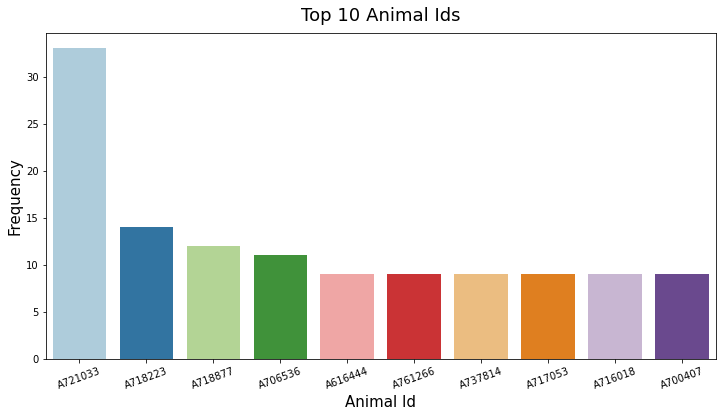

Name has 21054 unique values. Here are the top 10:



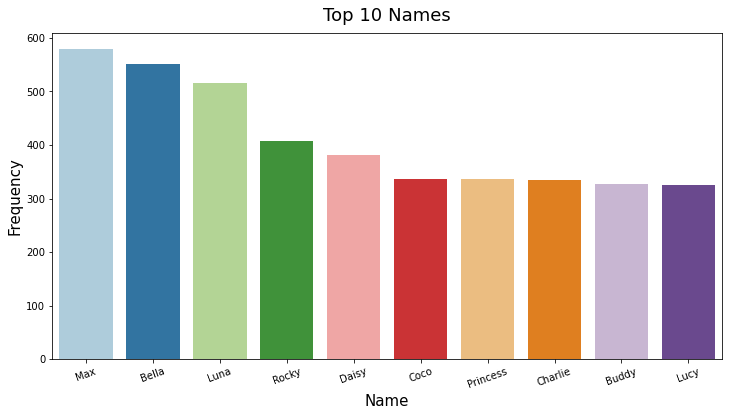

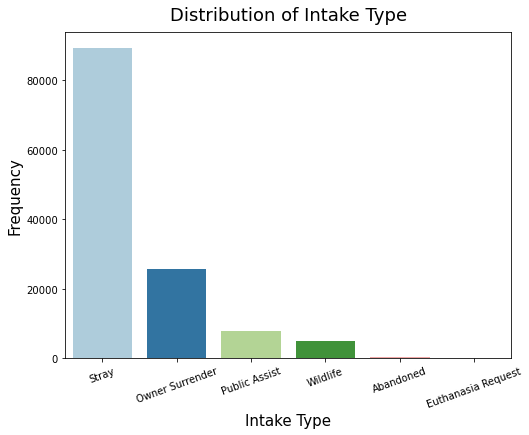

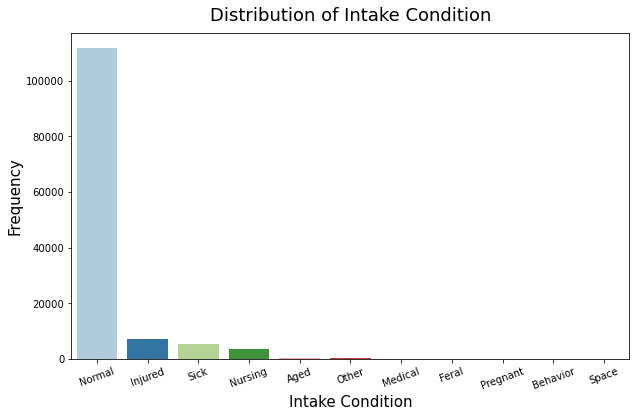

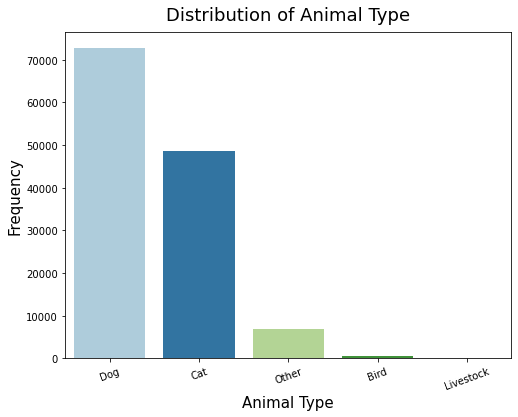

Breed has 2663 unique values. Here are the top 10:



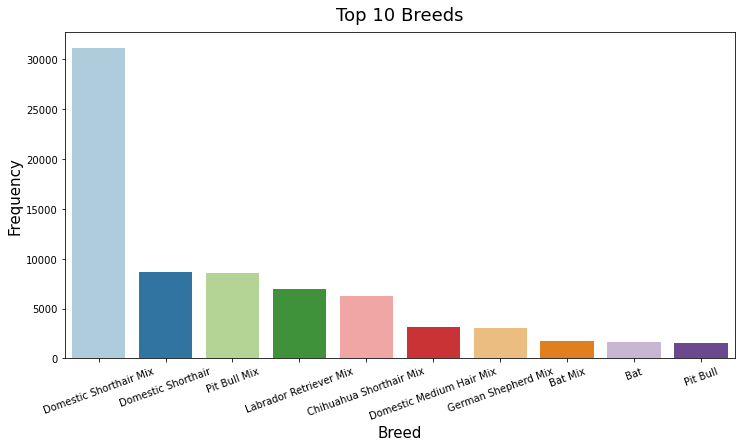

Color has 600 unique values. Here are the top 10:



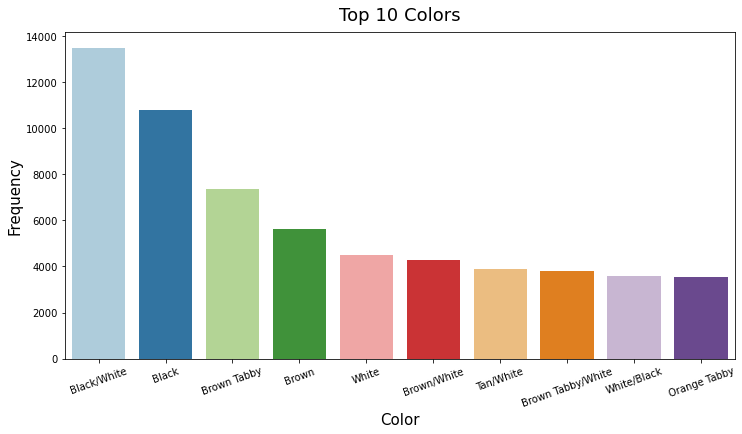

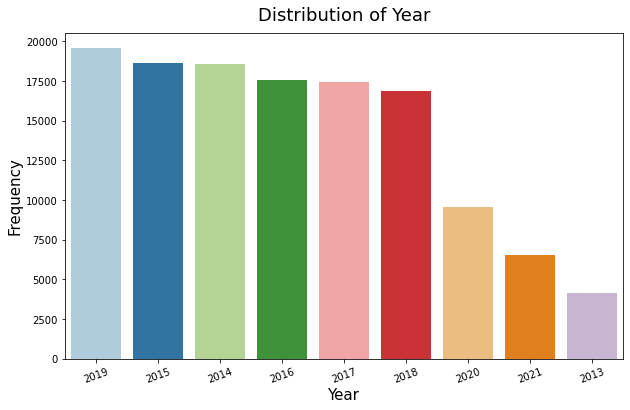

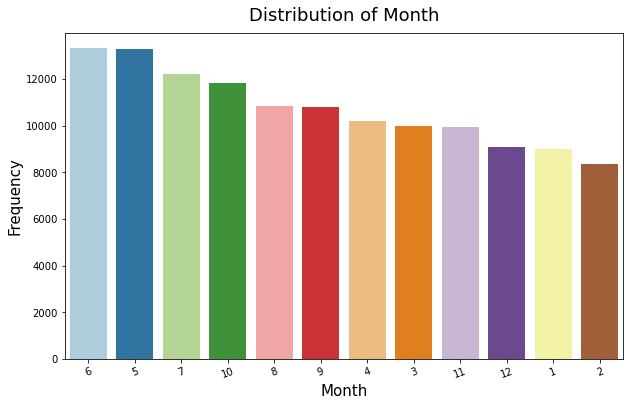

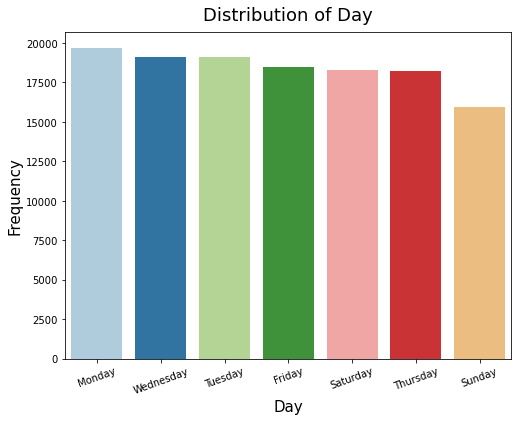

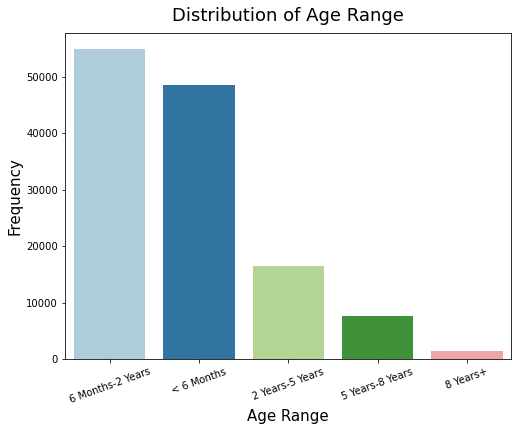

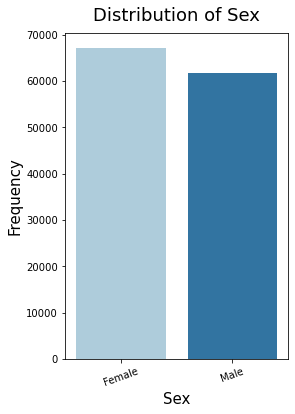

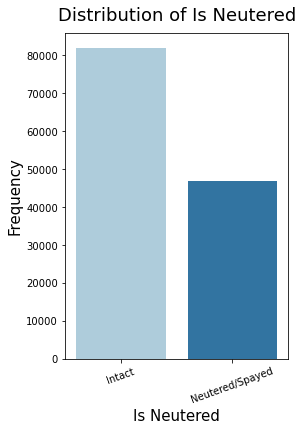

In [8]:
initial_eda(intakes)

To what degree does the actual year influence outcomes at an animal shelter? It is important to note that the data provided starts in October 2013 which explains the low distribution in that year. Below charts the frequency of intake entries, by year:

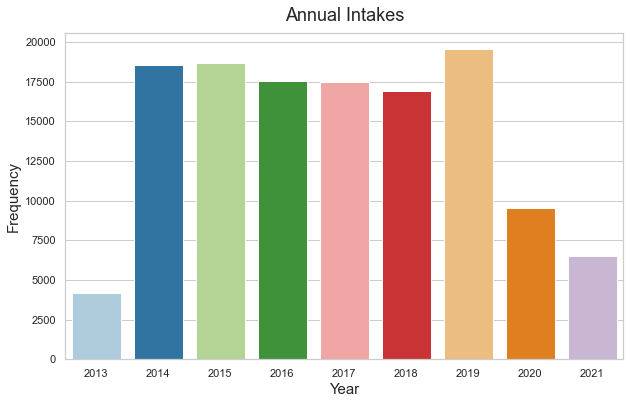

In [9]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10, 6))
sns.countplot(x=intakes['year'], 
              data=intakes, 
              palette="Paired",
             order = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.title('Annual Intakes', fontsize = 18, pad = 12)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15);

Do animal shelters see seasonal patterns? Note that incomplete or unusual years (such as 2020 due to COVID-19) were excluded from this analysis. As with yearly distribution, frequency by month can be seen in the cells below:

In [11]:
# Creating DataFrame of intakes from years 2014-2019
intakes_2014_2019 = intakes[intakes['year']!='2013']
intakes_2014_2019 = intakes_2014_2019[intakes_2014_2019['year']!='2020']
intakes_2014_2019 = intakes_2014_2019[intakes_2014_2019['year']!='2021']

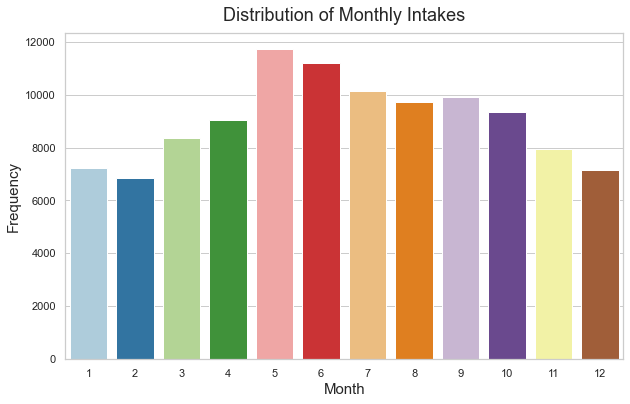

In [12]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10, 6))

sns.countplot(x=intakes_2014_2019['month'], 
              data=intakes_2014_2019, 
              palette="Paired",
             order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.title('Distribution of Monthly Intakes', fontsize = 18, pad = 12)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15);

We can see that the shelter has the highest amount of intakes in the late spring and early summer months.

## IV. EDA - Outcomes

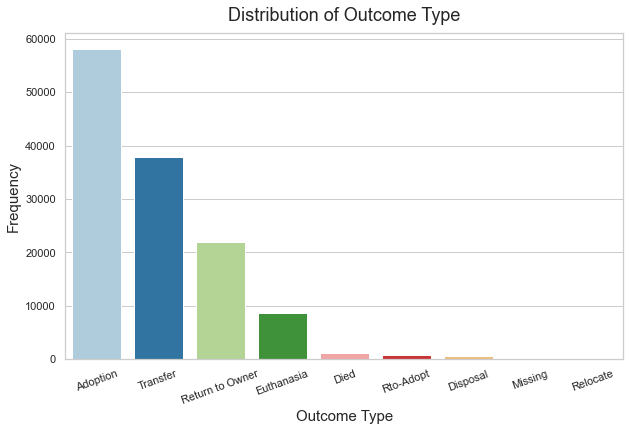

Outcome Subtype has 25 unique values. Here are the top 10:



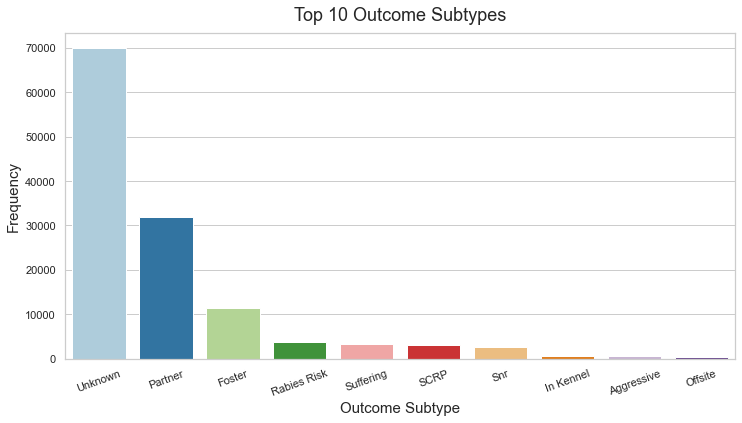

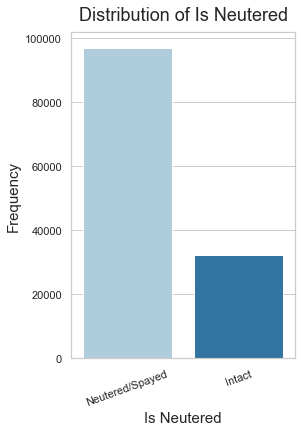

In [13]:
initial_eda(outcomes[['outcome_type', 'outcome_subtype', 'is_neutered']])

## V. EDA - Comparing Intakes vs. Outcomes

Taking a closer look at major differences between intakes and outcomes.

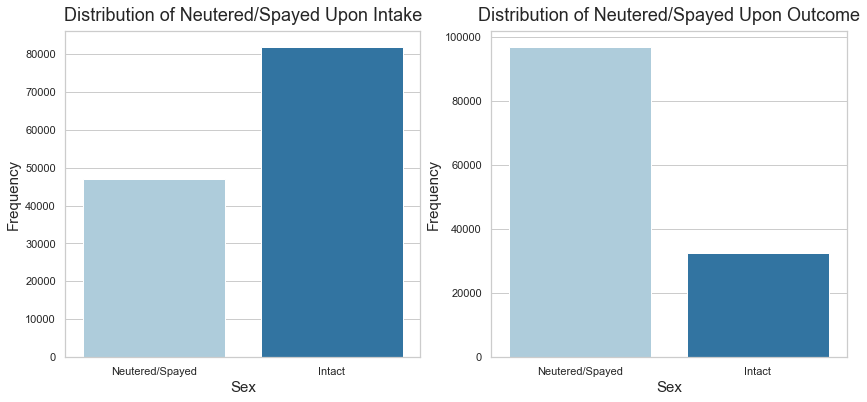

In [14]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x=intakes['is_neutered'], 
              data=intakes, 
              palette="Paired")
plt.title('Distribution of Neutered/Spayed Upon Intake', fontsize = 18, pad = 10)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel("Frequency",fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(x=outcomes['is_neutered'], 
              data=outcomes, 
              palette="Paired")
plt.title('Distribution of Neutered/Spayed Upon Outcome', fontsize = 18, pad = 10)
plt.xlabel("Sex", fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel("Frequency",fontsize = 15);

As we can see, the Austin Animal Center does a great job spaying/neutering animals upon intake.

Additional EDA will be completed after merging the two DataFrames on the next notebook.

# ***Next Notebook*** - [03: Final Data Prep](https://github.com/ksylvia16/Animal-Outcomes-Austin-TX/blob/f7101b0ab115bdc730fb2574c0439b9e734f7b0a/code/03_Final_Data_Prep.ipynb)